# LabWork 1.5

Necessary imports and configs

In [100]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
import time

% matplotlib inline

Define custom discrete fourier transformation method

In [101]:
def dft(x):
    N = len(x)
    X = np.zeros(N)
    for k in range(1, N):
        sum_x = 0
        for n in range(1, N):
            sum_x = sum_x + x[n] * np.exp(-2 * np.pi * 1j * n * k / N)
        X[k] = sum_x
    return X

Calculating Discrete Fourier Transform on sin signal

In [102]:
Fs = 100
ti = 0
tf = 1

t = np.arange(ti, tf - 1 / Fs, 1 / Fs)

f1 = 30
A1 = 1
phi1 = 0

s1 = A1 * np.sin(2 * np.pi * f1 * t + phi1)

startTime = time.time()
X = dft(s1)
elapsed = time.time() - startTime
print("Custom DFT execution time: {}".format(elapsed))

startTime = time.time()
X2 = np.fft.fft(s1)
elapsed = time.time() - startTime
print("Built in FFT execution time: {}".format(elapsed))


Custom DFT execution time: 0.08713150024414062
Built in FFT execution time: 0.00019073486328125


/home/xottabi4/Documents/augstskola/magistratura/bio_processing/bio-proc-homeworks/venv/lib/python3.5/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Ploting Discrete Fourier Transform on sin signal

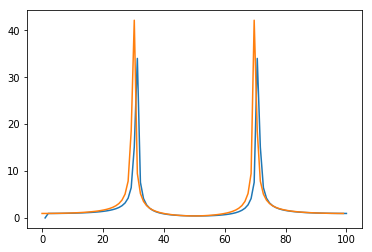

In [103]:
P1 = np.abs(np.real(X2)) ** 2
P2 = X2 * np.conj(X2)
# 
P3 = 10 * np.log(P2)
# % calculate Hertz values
f = np.arange(0, Fs - 1) * Fs / len(X2)
# % Plot spectrums
plt.plot(np.arange(1, Fs) * Fs / len(X2), np.abs(X))
plt.plot(f, np.abs(X2))

Using Inverse Discrete Fourier Transform

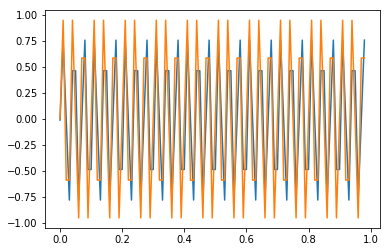

In [104]:
# Find the original signal
s1_estimated = np.fft.ifft(X)
plt.plot(t, np.real(s1_estimated), t, s1)


Cost function comparison

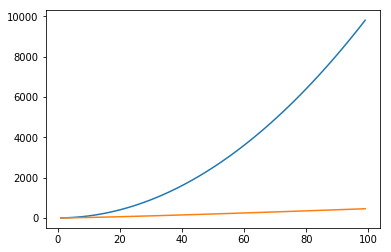

In [105]:
N = np.arange(1, 100)
plt.plot(N, N ** 2)
plt.plot(N, N * np.log(N))